**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Graded Challenge 1

Name: Gusti Ayu Dewi Puspa Kartikasari
Batch: 012

## Description

### Objective

Finding points stated on problem statement

### Problem Statement

1. provide data of which non legendary pokemon's element that superior (in terms of mean of total stats) in each generation for new player. In consideration that non legendary pokemon is easier to find and catch.

2. provide data for player that prioritize total stats but easier catch than the legendary pokemon. The player wants to know which generation has highest mean of total stats with the element of the non legendary pokemon.

3. provide data needed by player that prioritize the fun of catching pokemons to decide which generation to play. The data needed are the highest number of overall pokemon variety, the highest number of legendary pokemon and pokemon names that have stats near the one owned by legendary pokemon.


## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

#**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Data Loading**

In [2]:
df = pd.read_csv('Pokemon.csv')

Data head display to know columns

In [3]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#**Data Cleaning : Missing value**

Detecting missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Note: there is 386 null object (missing value) in type 2, need to converted to NA

Missing value conversion to NA (in here 'None' is chosen to fill in empty type2)

In [5]:
df['Type 2'] = df['Type 2'].fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Note: The missing value has been filled with 'None' indicated by Type 2 has 800 non-null from 414 in the previous

#**Data Exploration**
 : Rename column name, deleting the unused column, creating minimum 3 query, minimum 3 grouping, minimum 3 plots.

In [6]:
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


Rename the column of:

Type1-> element,

Type2 -> element,

Total -> Total_stats,

Sp. Atk -> Sp_Atk,

Sp. Def -> Sp_Def

In [7]:
pkmn = df.copy()

pkmn.rename(columns={'Type 1':'Element1','Type 2':'Element2','Total':'Total_stats','Sp. Atk':'Sp_Atk','Sp. Def':'Sp_Def'}, inplace = True)
pkmn.head()

,#,Name,Element1,Element2,Total_stats,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


The columns are renamed. proceed to drop unused column: column '#'

In [8]:
pkmn.drop(labels=['#'], axis=1,inplace=True)
pkmn.head()

,Name,Element1,Element2,Total_stats,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


##Problem 1: provide data of which non legendary pokemon's element that superior (in terms of mean of total stats) in each generation for new player. In consideration that non legendary pokemon is easier to find and catch.

In [9]:
# first querry: filtering non legendary pokemon
non_legendary_pokemon = pkmn[(pkmn["Legendary"] == False)]
non_legendary_pokemon.head()

,Name,Element1,Element2,Total_stats,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [10]:
non_legendary_pokemon.shape

(735, 12)

The data of legendary pokemon already erased in non_legendary_pokemon, it is proved by the number of row are reduced from 800 to 735.
65 rows deleted are legendary, as can be proved in the code below:

In [11]:
pkmn[(pkmn["Legendary"] == True)].shape

(65, 12)

Combining Element1 and Element2 as 'Element1 - Element2', in order to not combining data between single type pokemon with the double type pokemon that may distorted the conclusion.

In [12]:
Element_all = []

for idx in range(0,len(non_legendary_pokemon)):
    Combined_element = (f'{non_legendary_pokemon.iloc[idx,1]} - {non_legendary_pokemon.iloc[idx,2]}') #format for the column
    Element_all.append(Combined_element)

non_legendary_pokemon['Combined_El'] = Element_all #adding the result to the table
non_legendary_pokemon.drop(labels=['Element1','Element2'], axis=1,inplace=True) #deleting type 1 and type 2 column
non_legendary_pokemon.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Name,Total_stats,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Combined_El
0,Bulbasaur,318,45,49,49,65,65,45,1,False,Grass - Poison
1,Ivysaur,405,60,62,63,80,80,60,1,False,Grass - Poison
2,Venusaur,525,80,82,83,100,100,80,1,False,Grass - Poison
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,False,Grass - Poison
4,Charmander,309,39,52,43,60,50,65,1,False,Fire - None


The result of combining element can be seen on Combined_El column. Here the group of Grass-None (single element) and Grass-Poison (double element) can be separated.
Start using query to filter the data for each generation and use group by to combine the data according to the element.

In [13]:
# Generation = 1
#using query to filter the data for generation 1 and use group by to combine the data according to the element
gen1 = non_legendary_pokemon.query("Generation == 1").groupby(["Generation", "Combined_El"])[["Total_stats"]].mean() 
gen1 = gen1.sort_values(by="Total_stats", ascending=False).head(3)
gen1

Total_stats
Generation Combined_El                 
1          Water - Dark           640.0
           Fire - Dragon          634.0
           Dragon - Flying        600.0

From this data can be seen the top three element in terms of mean of total stats in generation 1 is:
Water - Dark, Fire - Dragon, and Dragon - Flying	

In [14]:
# Generation = 2
#using query to filter the data for generation 2 and use group by to combine the data according to the element
gen2 = non_legendary_pokemon.query("Generation == 2").groupby(["Generation", "Combined_El"])[["Total_stats"]].mean()
gen2 = gen2.sort_values(by="Total_stats", ascending=False).head(3)
gen2

Total_stats
Generation Combined_El                   
2          Rock - Dark              650.0
           Electric - Dragon        610.0
           Psychic - Grass          600.0

From this data can be seen the top three element in terms of mean of total stats in generation 2 is:
Rock - Dark, Electric - Dragon, and Psychic - Grass

In [15]:
# Generation = 3
#using query to filter the data for generation 3 and use group by to combine the data according to the element
gen3 = non_legendary_pokemon.query("Generation == 3").groupby(["Generation", "Combined_El"])[["Total_stats"]].mean()
gen3 = gen3.sort_values(by="Total_stats", ascending=False).head(3)
gen3

Total_stats
Generation Combined_El                 
3          Grass - Dragon    630.000000
           Steel - None      630.000000
           Dragon - Flying   596.666667

From this data can be seen the top three element in terms of mean of total stats in generation 3 is:
Grass - Dragon, Steel - None, and Dragon - Flying

In [16]:
# Generation = 4
#using query to filter the data for generation 4 and use group by to combine the data according to the element
gen4 = non_legendary_pokemon.query("Generation == 4").groupby(["Generation", "Combined_El"])[["Total_stats"]].mean()
gen4 = gen4.sort_values(by="Total_stats", ascending=False).head(3)
gen4


Total_stats
Generation Combined_El                    
4          Normal - Fighting         580.0
           Fighting - Steel          575.0
           Psychic - Fighting        568.0

From this data can be seen the top three element in terms of mean of total stats in generation 4 is:
Normal - Fighting, Fighting - Steel, and Psychic - Fighting

In [17]:
# Generation = 5
#using query to filter the data for generation 5 and use group by to combine the data according to the element
gen5 = non_legendary_pokemon.query("Generation == 5").groupby(["Generation", "Combined_El"])[["Total_stats"]].mean()
gen5 = gen5.sort_values(by="Total_stats", ascending=False).head(3)
gen5

Total_stats
Generation Combined_El                   
5          Normal - Psychic         600.0
           Normal - Fighting        600.0
           Water - Fighting         580.0

From this data can be seen the top three element in terms of mean of total stats in generation 5 is:
Normal - Psychic, Normal - Fighting, and Water - Fighting

In [18]:
# Generation = 6
#using query to filter the data for generation 6 and use group by to combine the data according to the element
gen6 = non_legendary_pokemon.query("Generation == 6").groupby(["Generation", "Combined_El"])[["Total_stats"]].mean()
gen6 = gen6.sort_values(by="Total_stats", ascending=False).head(3)
gen6

Total_stats
Generation Combined_El                  
6          Fire - Psychic          534.0
           Grass - Fighting        530.0
           Water - Dark            530.0

From this data can be seen the top three element in terms of mean of total stats in generation 6 is:
Fire - Psychic, Grass - Fighting, and Water - Dark

1. From all data processing can be concluded that the three recommended element for each generations are:
Generation 1: Water - Dark, Fire - Dragon, and Dragon - Flying
Generation 2: Rock - Dark, Electric - Dragon, and Psychic - Grass
Generation 3: Grass - Dragon, Steel - None, and Dragon - Flying
Generation 4: Normal - Fighting, Fighting - Steel, and Psychic - Fighting
Generation 5: Normal - Psychic, Normal - Fighting, and Water - Fighting
Generation 6: Fire - Psychic, Grass - Fighting, and Water - Dark

##PROBLEM 2: provide data for player that prioritize total stats but easier catch than the legendary pokemon. The player wants to know which generation has highest mean of total stats with the element of the non legendary pokemon.

In [19]:
all_gen = pd.concat([gen1,gen2,gen3,gen4,gen5,gen6],join = 'outer', axis=0, sort=True) #joining all data of total stats from problem 1
all_gen = all_gen.sort_values(by="Total_stats", ascending=False) #sort based on total stats
all_gen.head()

Total_stats
Generation Combined_El                
2          Rock - Dark           650.0
1          Water - Dark          640.0
           Fire - Dragon         634.0
3          Grass - Dragon        630.0
           Steel - None          630.0

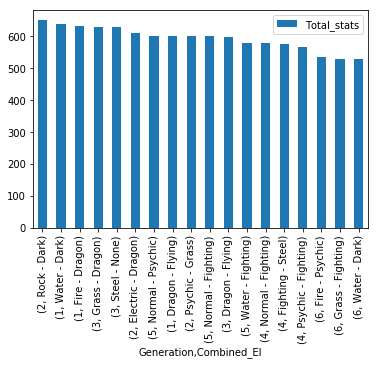

In [20]:
all_gen.plot(kind = "bar")

The table and graphic created from all non legendary pokemon data shown that the element of Rock-Dark from generation 2 has the highest total stats. The player may play in generation 2 and focused on element of Rock-Dark.

##Problem 3: provide data needed by player that prioritize the fun of catching pokemons to decide which generation to play. The data needed are the highest number of overall pokemon variety and also the highest number of legendary pokemon.

In [21]:
pkmn.head()

,Name,Element1,Element2,Total_stats,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [22]:
pkmn.groupby(["Generation", "Legendary"])[["Legendary"]].count() #count the number of pokemon based the rarity (legendary or non legendary) 

Legendary
Generation Legendary           
1          False            160
           True               6
2          False            101
           True               5
3          False            142
           True              18
4          False            108
           True              13
5          False            150
           True              15
6          False             74
           True               8

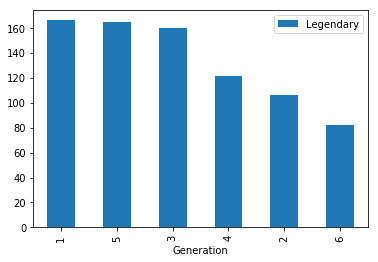

In [23]:
#ploting the number of pokemon in each generation in descending order.
pkmn_totalstats = pkmn.groupby(["Generation"])[["Legendary"]].count().sort_values(by="Legendary", ascending=False).plot(kind = "bar")

From the graph can be seen the highest variety of pokemon is owned by generation 1, therefore this generation can be recommended for player that prioritize in collecting high variety pokemons.

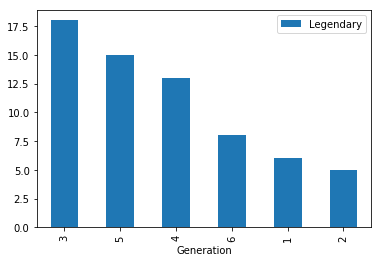

In [24]:
#ploting the number of legendary pokemon in each generation in descending order.
pkmn_totalstats = pkmn.query("Legendary == True").groupby(["Generation"])[["Legendary"]].count().sort_values(by="Legendary", ascending=False).plot(kind = "bar")

From the graph can be seen the highest variety of legendary pokemon is owned by generation 3, therefore this generation can be recommended for player that prioritize in collecting legendary pokemons.

In [25]:
#addition, data of non legendary pokemon that can be compared (difference < 100) with the legendary pokemon from other generation 
legendary_totalstats = pkmn.groupby(["Generation","Legendary","Name"])[["Total_stats"]].max().sort_values(by="Total_stats", ascending=False)
legendary_totalstats.head(20)

Total_stats
Generation Legendary Name                                
3          True      RayquazaMega Rayquaza            780
1          True      MewtwoMega Mewtwo Y              780
                     MewtwoMega Mewtwo X              780
3          True      KyogrePrimal Kyogre              770
                     GroudonPrimal Groudon            770
4          True      Arceus                           720
3          True      LatiosMega Latios                700
5          True      KyuremBlack Kyurem               700
                     KyuremWhite Kyurem               700
6          True      DiancieMega Diancie              700
4          False     GarchompMega Garchomp            700
3          False     MetagrossMega Metagross          700
                     SalamenceMega Salamence          700
           True      LatiasMega Latias                700
2          False     TyranitarMega Tyranitar          700
4          True      GiratinaAltered Forme            680
                     GiratinaOrigin Forme             680
2          True      Lugia                            680
4          True      Dialga                           680
3          True      Rayquaza                         680

From the table, information that obtained is there are several pokemon that has high total stats near the one that owned by legendary pokemon which are: GarchompMega Garchomp from generation 4, MetagrossMega Metagross and SalamenceMega Salamence from generation 3, and TyranitarMega Tyranitar from generation 2. 

In [26]:
#bonus information, the realtion between element and total stats
pkmn.groupby(["Element2","Element1"])[["Total_stats"]].max().sort_values(by="Total_stats", ascending=False).head(20)

Total_stats
Element2 Element1             
Flying   Dragon            780
Fighting Psychic           780
None     Psychic           780
         Water             770
Fire     Ground            770
None     Normal            720
Fairy    Rock              700
Psychic  Dragon            700
Ground   Dragon            700
Dark     Rock              700
Psychic  Steel             700
Ice      Dragon            700
Fire     Dragon            680
Electric Dragon            680
Dragon   Steel             680
Flying   Dark              680
Dragon   Water             680
Dark     Psychic           680
Dragon   Ghost             680
None     Fairy             680

From the table above, information that obtained is a pokemon that have 2 elements has greater total stats than the single element pokemon. Therefore player with total stats priorty may focused on dual element pokemon. 

## Conclusions, Assumptions, Overall Analysis

1. From all data processing can be concluded that the three recommended element for each generations are:
Generation 1: Water - Dark, Fire - Dragon, and Dragon - Flying
Generation 2: Rock - Dark, Electric - Dragon, and Psychic - Grass
Generation 3: Grass - Dragon, Steel - None, and Dragon - Flying
Generation 4: Normal - Fighting, Fighting - Steel, and Psychic - Fighting
Generation 5: Normal - Psychic, Normal - Fighting, and Water - Fighting
Generation 6: Fire - Psychic, Grass - Fighting, and Water – Dark

2. The table and graphic created from all non legendary pokemon data shown that the element of Rock-Dark from generation 2 has the highest total stats. The player may play in generation 2 and focused on element of Rock-Dark.


3. The highest variety of pokemon is owned by generation 1, therefore this generation can be recommended for player that prioritize in collecting high variety pokemons. 

The highest variety of legendary pokemon is owned by generation 3, therefore this generation can be recommended for player that prioritize in collecting legendary pokemons.

There are several pokemon that has high total stats near the one that woned by legendary pokemon which are: GarchompMega Garchomp from generation 4, MetagrossMega Metagross and SalamenceMega Salamence from generation 3, and TyranitarMega Tyranitar from generation 2. 

Bonus: A pokemon that have 2 elements has greater total stats than the single element pokemon. Therefore player with total stats priorty may focused on dual element pokemon. 
